### 1. Visualização e tratamento dos dados originais:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


data = pd.read_csv('sunspot.txt',  header=None, delim_whitespace=True)
del data[0] # Deleta a coluna dos "anos" ds dados originais
data = data.sort_index(ascending=True)
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,58.0,62.6,70.0,55.7,85.0,83.5,94.8,66.3,75.9,75.5,158.6,85.2
1,73.3,75.9,89.2,88.3,90.0,100.0,85.4,103.0,91.2,65.7,63.3,75.4
2,70.0,43.5,45.3,56.4,60.7,50.7,66.3,59.8,23.5,23.2,28.5,44.0
3,35.0,50.0,71.0,59.3,59.7,39.6,78.4,29.3,27.1,46.6,37.6,40.0
4,44.0,32.0,45.7,38.0,36.0,31.7,22.0,39.0,28.0,25.0,20.0,6.7


Como o problema de predição pede que a saída (label) de um conjunto de K=20 dados seja dado na seguinte forma y[n] = x[x(n-1) x(n-2) ... x(n-20)], é importante ressaltar que:
- Começamos o conjunto das labels com o valor 91.2, para termos 20 amostras passadas correspondente;
- Os 20 "primeiros" dados, portanto, __não entram__ no conjunto das labels.

Na célula seguinte obtemos o dataframe 'labels_full' que representa o conjunto de todas as labels dos dados

In [2]:
label_index = 0
i = 1
j = 9

labels_array = np.array([])

while i < 266:
    labels_array = np.append(labels_array,data.iloc[i][j].tolist())
    label_index+=1
    j+=1
    if(j>12):
        j=1
        i+=1

labels_full = pd.DataFrame(labels_array)
print(labels_full.shape)
labels_full.head()

(3172, 1)


,0
0,91.2
1,65.7
2,63.3
3,75.4
4,70.0


Note que as labels possuem 3172 valores, o que é coerente, pois são 3192 instâncias menos as 20 primeiras "perdidas".

Na célula seguinte, realizamos um procedimento parecido para obter os dados completos e tratados:

In [3]:
i = 0
j = 1
i_start = 0
j_start = 1
count_r = 0
count_c = 0
data_test_set = []

while count_r < 3172:
    data_row = np.array([])
    count_c = 0
    j = j_start
    i = i_start
    
    while count_c < 20:
        count_c+=1
        data_row = np.append(data_row, data.iloc[i][j].tolist())
        j+=1
        if(j>12):
            j=1
            i+=1
            
    j_start+=1
    if j_start > 12:
        j_start = 1
        i_start+=1
    data_test_set.append(data_row)
    count_r+=1
    
data_full_df = pd.DataFrame(data_test_set)

columns = data_full_df.columns.tolist()
columns = columns[::-1]
data_full_df = data_full_df[columns]
data_full_df.columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
print(data_full_df.shape)
data_full_df.head()

(3172, 20)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,103.0,85.4,100.0,90.0,88.3,89.2,75.9,73.3,85.2,158.6,75.5,75.9,66.3,94.8,83.5,85.0,55.7,70.0,62.6,58.0
1,91.2,103.0,85.4,100.0,90.0,88.3,89.2,75.9,73.3,85.2,158.6,75.5,75.9,66.3,94.8,83.5,85.0,55.7,70.0,62.6
2,65.7,91.2,103.0,85.4,100.0,90.0,88.3,89.2,75.9,73.3,85.2,158.6,75.5,75.9,66.3,94.8,83.5,85.0,55.7,70.0
3,63.3,65.7,91.2,103.0,85.4,100.0,90.0,88.3,89.2,75.9,73.3,85.2,158.6,75.5,75.9,66.3,94.8,83.5,85.0,55.7
4,75.4,63.3,65.7,91.2,103.0,85.4,100.0,90.0,88.3,89.2,75.9,73.3,85.2,158.6,75.5,75.9,66.3,94.8,83.5,85.0


Os padrões devem se comportar forma que a primeira variável seja o valor correspondente ao mês anterior imediato. Analisando o dataframe dos dados 'data_full_df', verificamos que está estruturado de forma correta.

Na célula seguinte, separamos os dados em forma de *__holdout__*, separando os 5 últimos anos para o conjunto de teste. Portanto, as 3112 primeiras instâncias representarão o conjunto de treinamento.

In [4]:
# Separação no modo holdout dos dados:
data_train_df = data_full_df.iloc[:3112][:].copy()
data_test_df = data_full_df.iloc[3132:][:].copy()
labels_train_df = labels_full[:3112].copy()
labels_test_df = labels_full[3132:].copy()
# Inserindo a coluna de 1s necessária para a realização da Regressão Linear:
data_train_df.insert(loc=0, column=0, value=1)
data_test_df.insert(loc=0, column=0, value=1)

print(data_train_df.shape)
data_train_df.head()

(3112, 21)


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1,103.0,85.4,100.0,90.0,88.3,89.2,75.9,73.3,85.2,...,75.5,75.9,66.3,94.8,83.5,85.0,55.7,70.0,62.6,58.0
1,1,91.2,103.0,85.4,100.0,90.0,88.3,89.2,75.9,73.3,...,158.6,75.5,75.9,66.3,94.8,83.5,85.0,55.7,70.0,62.6
2,1,65.7,91.2,103.0,85.4,100.0,90.0,88.3,89.2,75.9,...,85.2,158.6,75.5,75.9,66.3,94.8,83.5,85.0,55.7,70.0
3,1,63.3,65.7,91.2,103.0,85.4,100.0,90.0,88.3,89.2,...,73.3,85.2,158.6,75.5,75.9,66.3,94.8,83.5,85.0,55.7
4,1,75.4,63.3,65.7,91.2,103.0,85.4,100.0,90.0,88.3,...,75.9,73.3,85.2,158.6,75.5,75.9,66.3,94.8,83.5,85.0


In [5]:
print(labels_train_df.shape)
labels_train_df.head()

(3112, 1)


,0
0,91.2
1,65.7
2,63.3
3,75.4
4,70.0


### 2. Treinamento do modelo de Regressão Linear:

- Treinamos o modelo utilizando o dataframe 'data_train_df' que representa o conjunto de treinamento;
- Obtemos os pesos 'theta_best';
- Utilizamos o dataframe 'data_test_df' (conjunto de teste) para acharmos o erro quadrático médio (__*RMSE*__).

In [6]:
# Equação normal (theta que minimiza a função custo RMSE):
theta_best = np.linalg.inv(data_train_df.T.dot(data_train_df)).dot(data_train_df.T).dot(labels_train_df.values)
theta_best # Valores dos pesos

array([[ 3.40753279e+00],
       [ 5.42742346e-01],
       [ 9.36178958e-02],
       [ 1.01431739e-01],
       [ 8.66568705e-02],
       [ 3.81649881e-02],
       [ 6.33077050e-02],
       [ 8.09135445e-04],
       [ 2.78924119e-02],
       [ 9.55003770e-02],
       [ 2.07517303e-02],
       [ 2.67433309e-02],
       [ 5.34725403e-03],
       [-3.01700873e-02],
       [ 2.73501594e-02],
       [ 1.32974778e-02],
       [-4.66236520e-02],
       [-5.55622599e-04],
       [-7.26082436e-02],
       [-7.74804120e-03],
       [-5.20224438e-02]])

In [7]:
# Obtendo os valores estimados utilizando o parâmetro theta_best:
y_hat = data_test_df.dot(theta_best)

Comparando com as labels e erros correspondentes:

In [8]:
re = pd.DataFrame(abs(labels_test_df.values - y_hat))
compare = pd.concat([y_hat, labels_test_df, re], axis=1)
compare.columns = ['Valor Predito', 'Labels', 'Erro']
compare.head(10)

,Valor Predito,Labels,Erro
3132,48.738167,78.0,29.261833
3133,64.494459,88.0,23.505541
3134,74.748914,96.7,21.951086
3135,86.448831,73.0,13.448831
3136,78.455903,58.3,20.155903
3137,70.055699,32.9,37.155699
3138,54.191006,64.3,10.108994
3139,66.484442,55.2,11.284442
3140,62.222955,69.0,6.777045
3141,71.797679,64.5,7.297679


### 3. Cáculo do erro quadrático médio e plotagem do gráfico:
#### Item a.1)

Cálculando o erro quadrático médio __*RMSE*__:

In [9]:
import math
error_rmse = np.sqrt(np.mean((labels_test_df.values - y_hat)**2))
float(error_rmse)


16.492937783757835

#### Item a.2)

Gráfico com as amostras de teste da série temporal e suas respectivas estimativas geradas:

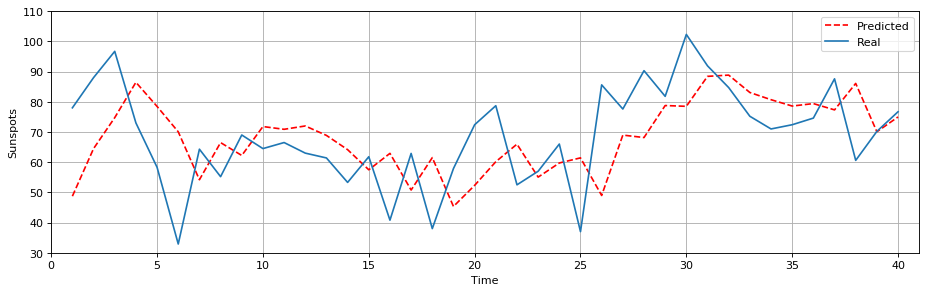

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')
x = np.linspace(1, 40,num=40)
plt.plot(x,y_hat.values,'--r',label='Test')
plt.plot(x,labels_test_df.values,'-')
plt.grid(True)
plt.gca().legend(('Predicted','Real'))
plt.xlabel('Time')
plt.ylabel('Sunspots')
plt.axis([0, 41, 30, 110])
plt.show()

### 4. RMSE com *Wrapper*

- Considerações:
    * Estratégia de Seleção de Variável: *Wrapper* com *Backward Elimination*
    * Esquema de Validação Cruzada: *K-folds* com $k = 4$
    * Validação cruzada no conjunto de **treinamento**
    * Restrição do modelo *Ridge Regression*
    * $\lambda = 1000, 10000, 15000, 50000$
    
    
- A separação dos dados na forma de *k-fold* é realizada de forma que obtemos uma tupla contendo os índices de treino e de teste (validação). É importante ressaltar que foi utilizada a função *random.shuffle* para permutar os índices. Desse modo, além do conjunto ser separado em $k$ pastas, os padrões são permutados.

In [11]:
import random
k = 4 # Número de pastas k-fold
kfolds = []
indexes = list(range(3112))
seed = 42
subset_size = round(len(indexes) / k)
random.Random(seed).shuffle(indexes)
subsets = [indexes[x:x+subset_size] for x in range(0,len(indexes),subset_size)]

for i in range(k):
    test = subsets[i]
    train = []
    for subset in subsets:
        if subset != test:
            train.append(subset)
    kfolds.append((train, test)) # Cria tupla kfolds

- A célula seguinte realiza todo o procedimento de busca dos valores *RMSE* mínimos e do hiperparâmetro $\lambda$ da regularização, levando em consideração *k-folds* em relação à variável retirada (*backward elimination*). No fim, serão printadas três listas:
    - Variáveis retiradas em ordem de exclusão
    - RMSE médio para cada variável retirada
    - $\lambda$ que minimizou o *RMSE* médio da variável correspondente
    
#### Item b)


In [12]:
# Listas de armazenamento:
min_rmse_indexes = [] # Lista que armazena as variáveis de entrada que vão saindo sequencialmente
min_rmse_values = [] # Lista que armazena todos os valores do RMSE médio na medida que as variáveis de entrada vão saindo
lambda_values = [] # Lista que armazena os valores do hiperparâmetro Lambda que minimizaram a RMSE média
# Cópia dos
data_wrapper = data_full_df.iloc[:3112][:].copy() # Copia os primeiros 3112 (conjunto de treinamento) padrões do dataset 
data_wrapper.columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] # Força
labels_wrapper = labels_full.copy() # Cria uma cópia de y (dados c/ labels)

N = 20 # Número de variaveis de entrada
lambdas = [0.1, 100, 1000, 10000, 50000] # Hiperparâmetro Lambda



print('(RMSE médio dos k folds, Variável Correspondente, Lambda Correspondente)')
while (N > 0):
    
    errors = [] # Reseta o vetor errors
    
    for column in data_wrapper:  
        best_data_wrapper = data_wrapper.copy() # Cria uma cópia do dataset data_wrapper 
        best_data_wrapper = best_data_wrapper.drop(column, axis=1) # Retira a coluna da interação
        best_data_wrapper.insert(loc=0, column=0, value=1) # Adiciona a coluna de 1s
        
        for lambd in lambdas:
            errors_array = []
            for num_fold in range(k):
                #print('Interação', num_fold ,'do kfold')
                indices = []
                indices_val = []

                for lists in kfolds[num_fold][0]:
                    for x in lists:
                        indices.append(x) # indices do conjunto de treino da pasta k

                for x in kfolds[num_fold][1]:
                    indices_val.append(x) # indices do conjunto de validação da pasta k

                I = np.identity(best_data_wrapper.shape[1]) * lambd # Matriz identidade
                I[0][0] = 0 # Forçando o primeiro valor a ser 0
                # Equação da Regularização de Thikonov utilizando o conjunto de treino da pasta k
                w = np.linalg.inv(best_data_wrapper.iloc[indices][:].T.dot(best_data_wrapper.iloc[indices][:])+I).dot(best_data_wrapper.iloc[indices][:].T).dot(labels_wrapper.iloc[indices][:].values)
                # Predições utilizando o conjunto de validação da pasta k
                y_hat_wrapper = best_data_wrapper.iloc[indices_val][:].dot(w)
                # Erro quadrático médio (RMSE) de validação da pasta k com um certo valor lambda
                error_val = np.sqrt(np.mean((labels_wrapper.iloc[indices_val][:].values - y_hat_wrapper)**2))
                errors_array.append(error_val.values) # Array dos k erros de validação
                
            rmse_median = np.mean(errors_array) # RMSE médio dos k erros de validação
            rmse_median_tuple = ((rmse_median, column, lambd)) # Tupla (RMSE médio, Variável, Valor do Hiperparâmetro)
            print(rmse_median_tuple)
            errors.append(rmse_median_tuple) # Append do erro correspondente a interação no vetor 'errors'
        
    data_wrapper = data_wrapper.drop(int(errors[errors.index(min(errors))][1]), axis=1) # Retira a variável de menor RMSE
    print('\n', '#'*5, 'VARIÁVEL RETIRADA:', errors[errors.index(min(errors))][1], '#'*5, '\n') # Printa qual variável saiu
    print('\n', '#'*5, 'HIPERPARÂMETRO CORRESPONDENTE:', errors[errors.index(min(errors))][2], '#'*5, '\n') # Lambda da variável
    min_rmse_values.append(errors[errors.index(min(errors))][0]) 
    min_rmse_indexes.append(errors[errors.index(min(errors))][1])
    lambda_values.append(errors[errors.index(min(errors))][2])
    print('\n', '#'*5, 'VARIÁVEIS RETIRADAS:', min_rmse_indexes, '#'*5, '\n') 
    N-=1
    
print('Variáveis retiradas:\n', min_rmse_indexes)
print('RMSE médio para cada variável retirada:\n', min_rmse_values)
print('Lambdas:\n', lambda_values)
    

(RMSE médio dos k folds, Variável Correspondente, Lambda Correspondente)
(17.69397113703052, 1, 0.1)
(17.693904944446047, 1, 100)
(17.693312548331587, 1, 1000)
(17.687762783080334, 1, 10000)
(17.669943199293634, 1, 50000)
(15.592958359472028, 2, 0.1)
(15.592910606619176, 2, 100)
(15.592486555933535, 2, 1000)
(15.588833822236936, 2, 10000)
(15.583504760667052, 2, 50000)
(15.596744527271444, 3, 0.1)
(15.596698443378616, 3, 100)
(15.59628967373307, 3, 1000)
(15.592807055003608, 3, 10000)
(15.588066837008942, 3, 50000)
(15.571957391328613, 4, 0.1)
(15.571911540713284, 4, 100)
(15.571505201674457, 4, 1000)
(15.568076809640852, 4, 10000)
(15.564009071830544, 4, 50000)
(15.551036336441673, 5, 0.1)
(15.550988538842905, 5, 100)
(15.55056456920574, 5, 1000)
(15.5469520255625, 5, 10000)
(15.54197689460645, 5, 50000)
(15.557683324374239, 6, 0.1)
(15.557636221957356, 6, 100)
(15.557218510569285, 6, 1000)
(15.55366816830933, 6, 10000)
(15.548965560209853, 6, 50000)
(15.542048933328358, 7, 0.1)
(15.5

(15.523556673694905, 16, 100)
(15.523257589488631, 16, 1000)
(15.520842267784648, 16, 10000)
(15.520265660268844, 16, 50000)
(15.508027092476254, 17, 0.1)
(15.507994127786768, 17, 100)
(15.507703182476948, 17, 1000)
(15.50536418977763, 17, 10000)
(15.505079305063129, 17, 50000)
(15.532346720540094, 18, 0.1)
(15.532315450067236, 18, 100)
(15.532039557502234, 18, 1000)
(15.529831641942726, 18, 10000)
(15.529818400432557, 18, 50000)
(15.507519490909468, 19, 0.1)
(15.507486686759076, 19, 100)
(15.507197173057737, 19, 1000)
(15.504871105931786, 19, 10000)
(15.504617800499707, 19, 50000)
(15.513806068077175, 20, 0.1)
(15.513775037069369, 20, 100)
(15.513501522441809, 20, 1000)
(15.511337352581355, 20, 10000)
(15.511805438521455, 20, 50000)

 ##### VARIÁVEL RETIRADA: 15 ##### 


 ##### HIPERPARÂMETRO CORRESPONDENTE: 10000 ##### 


 ##### VARIÁVEIS RETIRADAS: [11, 8, 15] ##### 

(17.656067581936412, 1, 0.1)
(17.656024730596368, 1, 100)
(17.65564155584792, 1, 1000)
(17.652083902396146, 1, 10000

(15.491451056671323, 19, 10000)
(15.49234089034771, 19, 50000)
(15.499515112089156, 20, 0.1)
(15.499487641588622, 20, 100)
(15.499246036442837, 20, 1000)
(15.497385244347349, 20, 10000)
(15.498927774236623, 20, 50000)

 ##### VARIÁVEL RETIRADA: 13 ##### 


 ##### HIPERPARÂMETRO CORRESPONDENTE: 10000 ##### 


 ##### VARIÁVEIS RETIRADAS: [11, 8, 15, 14, 12, 13] ##### 

(17.62334874128115, 1, 0.1)
(17.623315105852363, 1, 100)
(17.623014644174233, 1, 1000)
(17.620254351583966, 1, 10000)
(17.612517441529192, 1, 50000)
(15.546395636116843, 2, 0.1)
(15.546368676249136, 2, 100)
(15.546131035969728, 2, 1000)
(15.54425574453397, 2, 10000)
(15.545260009406693, 2, 50000)
(15.547431890079617, 3, 0.1)
(15.547404044352229, 3, 100)
(15.547158761883495, 3, 1000)
(15.545233390067288, 3, 10000)
(15.546023643196037, 3, 50000)
(15.514271729598079, 4, 0.1)
(15.51424687931067, 4, 100)
(15.514028833915887, 4, 1000)
(15.51239832091767, 4, 10000)
(15.514792136089786, 4, 50000)
(15.49832041376457, 5, 0.1)
(15.49

(17.626212687083907, 1, 100)
(17.626016843803924, 1, 1000)
(17.624261470009067, 1, 10000)
(17.62026206855409, 1, 50000)
(15.538396419143702, 2, 0.1)
(15.53837385084778, 2, 100)
(15.53817515779087, 2, 1000)
(15.536631832466412, 2, 10000)
(15.538157204741285, 2, 50000)
(15.543110551448741, 3, 0.1)
(15.543087148943695, 3, 100)
(15.542881360510583, 3, 1000)
(15.541301580872316, 3, 10000)
(15.542846281061554, 3, 50000)
(15.505988487052656, 4, 0.1)
(15.505969573868576, 4, 100)
(15.505804386359443, 4, 1000)
(15.504644287400149, 4, 10000)
(15.508199501752852, 4, 50000)
(15.491034213088229, 5, 0.1)
(15.491010978905699, 5, 100)
(15.490806861596074, 5, 1000)
(15.489257836553367, 5, 10000)
(15.491134689022319, 5, 50000)
(15.509629559330437, 6, 0.1)
(15.509606191442476, 6, 100)
(15.509401006069037, 6, 1000)
(15.507854123682801, 6, 10000)
(15.509961261796484, 6, 50000)
(15.56259456540947, 9, 0.1)
(15.562569908219189, 9, 100)
(15.562353043428779, 9, 1000)
(15.560683788067934, 9, 10000)
(15.5621889013

(21.43633964919569, 1, 100)
(21.43629992292334, 1, 1000)
(21.43609095111772, 1, 10000)
(21.43886835768887, 1, 50000)
(16.475008097311274, 4, 0.1)
(16.475004155495117, 4, 100)
(16.474972226813158, 4, 1000)
(16.475001009751352, 4, 10000)
(16.482106057027554, 4, 50000)
(16.15743031217363, 9, 0.1)
(16.157420948193664, 9, 100)
(16.157339783714523, 9, 1000)
(16.156835724059547, 9, 10000)
(16.160506659252533, 9, 50000)

 ##### VARIÁVEL RETIRADA: 9 ##### 


 ##### HIPERPARÂMETRO CORRESPONDENTE: 10000 ##### 


 ##### VARIÁVEIS RETIRADAS: [11, 8, 15, 14, 12, 13, 19, 17, 7, 16, 10, 5, 20, 6, 3, 2, 18, 9] ##### 

(21.988968064983293, 1, 0.1)
(21.988968579100938, 1, 100)
(21.98897466287331, 1, 1000)
(21.9891786428047, 1, 10000)
(21.993165893107786, 1, 50000)
(16.927287660478907, 4, 0.1)
(16.92728815017339, 4, 100)
(16.92729467732691, 4, 1000)
(16.927568491061997, 4, 10000)
(16.933273604627587, 4, 50000)

 ##### VARIÁVEL RETIRADA: 4 ##### 


 ##### HIPERPARÂMETRO CORRESPONDENTE: 0.1 ##### 


 ##### 

Conjunto ótimo de variáveis:

In [13]:
n_vars = min_rmse_values.index(min(min_rmse_values)) + 1
best_vars = min_rmse_indexes[n_vars:]
best_vars

[16, 10, 5, 20, 6, 3, 2, 18, 9, 4, 1]

Desse modo, temos $N_{min} = 9$ variáveis retiradas obtendo o menor valor do *RMSE* médio:

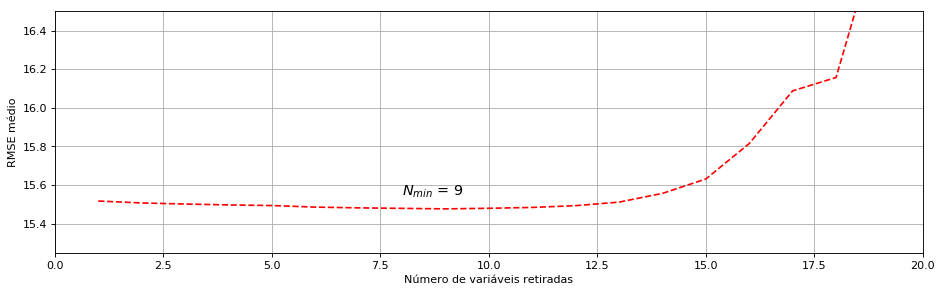

RMSE médio mínimo:  15.477202695856867


In [14]:
n = [x for x in range(1,21)]
figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(n,min_rmse_values,'r--')
plt.xlabel('Número de variáveis retiradas')
plt.ylabel('RMSE médio')
plt.text(8, 15.55, '$N_{min}$ = 9', fontsize=13)
plt.axis([0, 20, 15.25, 16.5])
plt.grid(True)
plt.show()
print('RMSE médio mínimo: ', min(min_rmse_values))

Note que apesar da diminuição do erro em relação ao modelo sem regularização e validação cruzada, há um custo computacional considerável.

### 5. RMSE com Filtro
#### Item c)
- Considerações:
    * Estratégia de Seleção de Variável: Filtro
    * Esquema de Validação Cruzada: *K-folds* com $k = 4$
    * Validação cruzada no conjunto de **treinamento**
    * Restrição do modelo *Ridge Regression*
    * $\lambda = 1000, 10000, 15000, 50000$

In [15]:
compare_dfs = pd.concat([data_train_df, labels_train_df], axis=1, ignore_index=True)
compare_dfs.rename(columns = {21  :'Labels'}, inplace=True)
del compare_dfs[0] # Deleta coluna de 1s
compare_corr = compare_dfs.corr()
compare_corr['Labels'].sort_values(ascending=False)

Labels    1.000000
1         0.924529
2         0.894178
3         0.880016
4         0.868379
5         0.854374
6         0.841594
7         0.823947
8         0.810687
9         0.800954
10        0.782038
11        0.761375
12        0.737882
13        0.712191
14        0.690798
15        0.665719
16        0.633848
17        0.605265
18        0.572490
19        0.545004
20        0.514945
Name: Labels, dtype: float64

Portanto, escolheremos as $N_{min} = 9$ variáveis ótimas utilizando o critério da correlação de *Pearson*. Desse modo, as variáveis $1$ a $9$ são escolhidas. Novamente fazendo *k folds*:

In [16]:
kfolds = []
indexes = list(range(3112))
seed = 42
subset_size = round(len(indexes) / k)
random.Random(seed).shuffle(indexes)
subsets = [indexes[x:x+subset_size] for x in range(0,len(indexes),subset_size)]

for i in range(k):
    test = subsets[i]
    train = []
    for subset in subsets:
        if subset != test:
            train.append(subset)
    kfolds.append((train, test)) # Cria tupla kfolds

Além disso, trataremos os dados para levar em consideração apenas a 9 primeiras variáveis, representando os 9 meses mais próximos da medição.

In [17]:
data_filter = data_train_df.copy()
labels_filter = labels_full.copy() # Cria uma cópia de y (dados c/ labels)
for i in range (10,21):
    del data_filter[i]

data_filter.head()

,0,1,2,3,4,5,6,7,8,9
0,1,103.0,85.4,100.0,90.0,88.3,89.2,75.9,73.3,85.2
1,1,91.2,103.0,85.4,100.0,90.0,88.3,89.2,75.9,73.3
2,1,65.7,91.2,103.0,85.4,100.0,90.0,88.3,89.2,75.9
3,1,63.3,65.7,91.2,103.0,85.4,100.0,90.0,88.3,89.2
4,1,75.4,63.3,65.7,91.2,103.0,85.4,100.0,90.0,88.3


In [18]:
errors = []
for lambd in lambdas:
    errors_array = []
    for num_fold in range(k):
        indices = []
        indices_val = []

        for lists in kfolds[num_fold][0]:
            for x in lists:
                indices.append(x) # indices do conjunto de treino da pasta k

        for x in kfolds[num_fold][1]:
            indices_val.append(x) # indices do conjunto de validação da pasta k

        I = np.identity(data_filter.shape[1]) * lambd # Matriz identidade
        I[0][0] = 0 # Forçando o primeiro valor a ser 0
        # Equação da Regularização de Thikonov utilizando o conjunto de treino da pasta k
        w = np.linalg.inv(data_filter.iloc[indices][:].T.dot(data_filter.iloc[indices][:])+I).dot(data_filter.iloc[indices][:].T).dot(labels_filter.iloc[indices][:].values)
        # Predições utilizando o conjunto de validação da pasta k
        y_hat_filter = data_filter.iloc[indices_val][:].dot(w)
        # Erro quadrático médio (RMSE) de validação da pasta k com um certo valor lambda
        error_val = np.sqrt(np.mean((labels_filter.iloc[indices_val][:].values - y_hat_filter)**2))
        errors_array.append(error_val.values) # Array dos k erros de validação


    rmse_median = np.mean(errors_array) # RMSE médio dos k erros de validação
    rmse_median_tuple = ((rmse_median, lambd)) # Tupla (RMSE médio, Variável, Valor do Hiperparâmetro)
    print(rmse_median_tuple)
    errors.append(rmse_median_tuple) # Append do erro correspondente a interação no vetor 'errors'

print('RMSE médio mínimo: ', errors[errors.index(min(errors))][0])
print('Lambda: ', errors[errors.index(min(errors))][1])

(15.840567850799733, 0.1)
(15.84054101948422, 100)
(15.840305613036708, 1000)
(15.83855070297372, 10000)
(15.84152793360917, 50000)
RMSE médio mínimo:  15.83855070297372
Lambda:  10000


Para o cenário em questão, o erro médio achado é, de fato, menor que o RMSE médio encontrado com o *wrapper*. No entanto, é computacionalmente bem mais fácil de se obter através do filtro.